In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


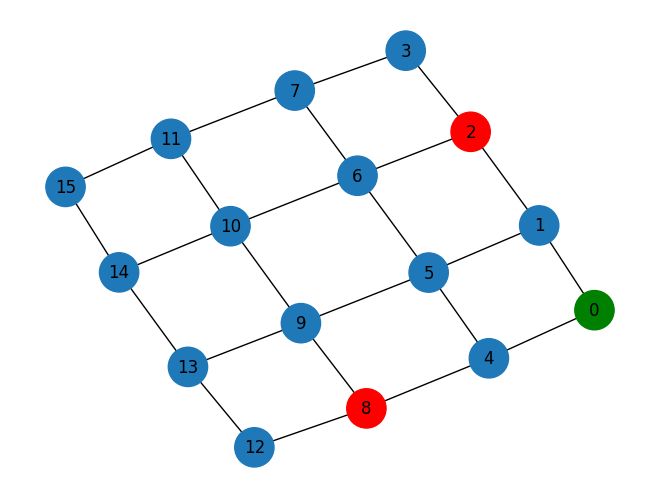

In [2]:
rede = Network()
controller = Controller(rede)

# Chamada corrigida para passar a topologia corretamente
rede.set_ready_topology('grade', 8, 4, 4, clients=[8,2], server=0)  # 8 clientes, 4x4 de topologia
rede.draw()
Logger.activate(Logger)


In [3]:
clientes = [8,2]  

for _ in range(3): 
    alice_id = random.choice(clientes)
    bob_id = 0
    num_qubits = random.randint(3, 6)
    num_gates = random.randint(20, 25)
    scenario = 1

    request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates, scenario=scenario)
    controller.receive_request(request)


controller.process_requests()
controller.send_scheduled_requests()


2024-12-17 00:28:31,161: Circuito aleatório gerado com 5 qubits e 22 portas. Instruções sobre o circuito.
2024-12-17 00:28:31,162: Instrução: {'operation': 's', 'qubits': [4]}
2024-12-17 00:28:31,162: Instrução: {'operation': 's', 'qubits': [1]}
2024-12-17 00:28:31,162: Instrução: {'operation': 'cz', 'qubits': [4, 3]}
2024-12-17 00:28:31,163: Instrução: {'operation': 's', 'qubits': [2]}
2024-12-17 00:28:31,164: Instrução: {'operation': 'cz', 'qubits': [3, 0]}
2024-12-17 00:28:31,165: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-17 00:28:31,166: Instrução: {'operation': 's', 'qubits': [2]}
2024-12-17 00:28:31,167: Instrução: {'operation': 'x', 'qubits': [2]}
2024-12-17 00:28:31,168: Instrução: {'operation': 'cx', 'qubits': [2, 4]}
2024-12-17 00:28:31,170: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-12-17 00:28:31,170: Instrução: {'operation': 'cz', 'qubits': [2, 3]}
2024-12-17 00:28:31,171: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-12-17 00:28:31,172: Instr

                                                                 ┌───┐
q_0: ───────────■──────────────────────────────────X───X───────X─┤ H ├
     ┌───┐┌───┐ │                                  │   │       │ └───┘
q_1: ┤ S ├┤ Y ├─┼──────────────────────────────────┼───X───■───┼──────
     ├───┤├───┤ │ ┌───┐     ┌───┐   ┌───┐   ┌───┐  │     ┌─┴─┐ │      
q_2: ┤ S ├┤ S ├─┼─┤ X ├──■──┤ X ├─■─┤ X ├─X─┤ S ├──X─────┤ X ├─┼──────
     └───┘└───┘ │ └───┘  │  └─┬─┘ │ └─┬─┘ │ ├───┤        └───┘ │      
q_3: ───────■───■────────┼────■───■───■───┼─┤ X ├──────────────┼──────
     ┌───┐  │          ┌─┴─┐              │ ├───┤┌───┐         │      
q_4: ┤ S ├──■──────────┤ X ├──────────────X─┤ Y ├┤ Z ├─────────X──────
     └───┘             └───┘                └───┘└───┘                
     ┌───┐┌───┐           ┌───┐                                                
q_0: ┤ X ├┤ X ├──────X──■─┤ T ├─X──────────────────■──────────────X────────────
     └─┬─┘└─┬─┘┌───┐ │  │ └───┘ │                ┌─┴─┐     

2024-12-17 00:28:31,366: Circuito aleatório gerado com 4 qubits e 24 portas. Instruções sobre o circuito.
2024-12-17 00:28:31,367: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-17 00:28:31,368: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-12-17 00:28:31,368: Instrução: {'operation': 'cx', 'qubits': [3, 0]}
2024-12-17 00:28:31,370: Instrução: {'operation': 'cx', 'qubits': [3, 1]}
2024-12-17 00:28:31,370: Instrução: {'operation': 'swap', 'qubits': [1, 0]}
2024-12-17 00:28:31,371: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-12-17 00:28:31,373: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-17 00:28:31,373: Instrução: {'operation': 'swap', 'qubits': [0, 3]}
2024-12-17 00:28:31,374: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-17 00:28:31,375: Instrução: {'operation': 'x', 'qubits': [2]}
2024-12-17 00:28:31,375: Instrução: {'operation': 'h', 'qubits': [3]}
2024-12-17 00:28:31,376: Instrução: {'operation': 'cx', 'qubits': [1, 3]}
2024-12-17 00:28:31,37

                                                                       
q_0: ──────────────────■────────────────────────────────────────────■──
     ┌───┐             │                                            │  
q_1: ┤ X ├─X─────■─────┼──X────────────────────────────────────■────┼──
     └─┬─┘ │     │     │  │                                    │    │  
q_2: ──┼───X──X──┼──■──┼──┼───────────────────────────────■────┼────■──
       │      │  │  │  │  │              ┌───┐┌───┐┌───┐  │  ┌─┴─┐┌───┐
q_3: ──■──────X──┼──■──┼──┼───────X───■──┤ H ├┤ S ├┤ S ├──┼──┤ X ├┤ T ├
     ┌───┐       │     │  │ ┌───┐ │ ┌─┴─┐├───┤└───┘├───┤  │  └───┘└───┘
q_4: ┤ H ├───────┼─────┼──┼─┤ X ├─┼─┤ X ├┤ Z ├──■──┤ H ├──┼────■───────
     ├───┤       │     │  │ └─┬─┘ │ └───┘└───┘  │  └───┘┌─┴─┐  │       
q_5: ┤ H ├───────■─────■──X───■───X─────────────■───────┤ X ├──■───────
     └───┘                                              └───┘          


2024-12-17 00:28:31,578: Executando requisições do timeslot 1.
2024-12-17 00:28:31,580: Timeslot 3: Buscando rota válida entre 2 e 0.
2024-12-17 00:28:31,580: Rota válida encontrada: [2, 1, 0]
2024-12-17 00:28:31,580: Executando requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC
2024-12-17 00:28:31,582: Timeslot 4: Iniciando protocolo Andrew Childs entre Alice 2 e Bob 0.
2024-12-17 00:28:31,583: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2024-12-17 00:28:31,583: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2024-12-17 00:28:31,584: Cliente criou 5 qubits para a transmissão.
2024-12-17 00:28:31,585: Qubit 820 registrado no timeslot 4
2024-12-17 00:28:31,586: Qubit 30 registrado no timeslot 4
2024-12-17 00:28:31,586: Qubit 359 registrado no timeslot 4
2024-12-17 00:28:31,587: Qubit 24 registrado no timeslot 4
2024-12-17 00:28:31,587: Qubit 534 registrado no timeslot 4
2024-12-17 00:28:31,588: Qubit 820 criado pelo Cliente - Estado: 0, Fase: 1
20

Pares EPRs adicionados
Hosts inicializados


2024-12-17 00:28:32,095: Fidelidade do EPR 0->4: 0.988065780494209
2024-12-17 00:28:32,096: Fidelidade do EPR 4->8: 0.988065780494209
2024-12-17 00:28:32,096: Produto das fidelidades para rota [0, 4, 8]: 0.9762739865836304
2024-12-17 00:28:32,097: Fidelidade atual da rota: 0.9762739865836304
2024-12-17 00:28:32,097: Pares EPRs restantes no segmento 0 -> 4: 12
2024-12-17 00:28:32,098: Pares EPRs restantes no segmento 4 -> 8: 12
2024-12-17 00:28:32,098: Fidelidade final: 0.9254 (F_qubit: 0.9479 * F_rota: 0.9763)
2024-12-17 00:28:32,100: Foram utilizados 12 pares EPRs ao longo da transmissão.
2024-12-17 00:28:32,101: Estado final dos EPRs restantes na rota:
2024-12-17 00:28:32,101: Segmento 0 -> 4: 12 pares EPRs restantes.
2024-12-17 00:28:32,102: Segmento 4 -> 8: 12 pares EPRs restantes.
2024-12-17 00:28:32,102: Transmissão de 6 qubits entre 0 e 8 concluída com sucesso.
2024-12-17 00:28:32,103: Servidor devolveu 0 qubits para o cliente.
2024-12-17 00:28:32,103: Qubit 810 devolvido para o

Pares EPRs adicionados
Hosts inicializados


In [4]:
controller.generate_schedule_report()

=== Relatório de Requisições ===
Requisições Executadas:
- {'alice_id': 2, 'bob_id': 0, 'num_qubits': 5, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001908E472A90>, 5), 'protocol': 'AC_BQC', 'slice_path': None, 'scenario': 1} | Timeslot: 1
- {'alice_id': 8, 'bob_id': 0, 'num_qubits': 4, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001908F8E3D10>, 4), 'protocol': 'AC_BQC', 'slice_path': None, 'scenario': 1} | Timeslot: 1
- {'alice_id': 8, 'bob_id': 0, 'num_qubits': 6, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001908F8ECE90>, 6), 'protocol': 'AC_BQC', 'slice_path': None, 'scenario': 1} | Timeslot: 2


In [6]:
rede.get_total_useds_eprs()

2024-12-17 00:28:32,157: Eprs criados na camada PhysicalLayer: 0
2024-12-17 00:28:32,158: Eprs usados na camada LinkLayer: 0
2024-12-17 00:28:32,160: Eprs usados na camada NetworkLayer: 0
2024-12-17 00:28:32,161: Eprs usados na camada ApplicationLayer: 60


60

In [7]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9237


0.9237074739434359

In [8]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9216
0.9493
0.9317
0.9155
0.8948
0.9051
0.9324
0.9151
0.8991
0.8788
0.9177
0.8973
0.9194
0.8961
0.9040
0.8840
0.9057
0.8827
0.9941
0.9281
0.9877
0.9496
0.9357
0.9451
0.9734
0.9088
0.9671
0.9299
0.9162
0.9254
